<a href="https://colab.research.google.com/github/Eman-Nasr/AI-pest-Detection-/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
from tensorflow import keras
import os

model_path = "/content/drive/My Drive/insect_classifier.keras"

if os.path.exists(model_path):
    model = keras.models.load_model(model_path)
    print("Model loaded successfully!")
else:
    print("Model not found. Train it first.")


Model loaded successfully!


In [ ]:
model.save("/content/drive/My Drive/insect_classifier.keras")


In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Import necessary libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import os
import json  # For saving training history

# Define dataset path
dataset_path = "/content/drive/My Drive/insect"

# Define image parameters
img_height, img_width = 150, 150
batch_size = 32

# Load dataset (BEFORE augmentation)
raw_train_ds = keras.preprocessing.image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

raw_val_ds = keras.preprocessing.image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

# Get class names BEFORE applying augmentation
class_names = raw_train_ds.class_names
num_classes = len(class_names)
print("Classes:", class_names)

# Apply Data Augmentation
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
])

# Map augmentation onto dataset
train_ds = raw_train_ds.map(lambda x, y: (data_augmentation(x, training=True), y))
val_ds = raw_val_ds

# Define Improved CNN Model
model = keras.Sequential([
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),

    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')  # Output layer
])

# Compile Model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train model with Learning Rate Scheduler
epochs = 20
lr_scheduler = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.00001)

# Train the model
history = model.fit(train_ds, validation_data=val_ds, epochs=epochs, callbacks=[lr_scheduler])

# Save Model
model_path = "/content/drive/My Drive/insect_classifier.keras"
model.save(model_path)
print("Model saved at", model_path)

# Save Training History
history_file = "/content/drive/My Drive/insect_training_history.json"

with open(history_file, "w") as f:
    json.dump(history.history, f)

print("Training history saved at", history_file)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Found 6772 files belonging to 2 classes.
Using 5418 files for training.
Found 6772 files belonging to 2 classes.
Using 1354 files for validation.
Classes: ['harmful', 'not_harm']


/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 671s 4s/step - accuracy: 0.7078 - loss: 2.2315 - val_accuracy: 0.7821 - val_loss: 0.6438 - learning_rate: 0.0010
Epoch 2/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 608s 3s/step - accuracy: 0.7752 - loss: 0.5086 - val_accuracy: 0.3442 - val_loss: 5.7304 - learning_rate: 0.0010
Epoch 3/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 616s 3s/step - accuracy: 0.7909 - loss: 0.4860 - val_accuracy: 0.7312 - val_loss: 0.5528 - learning_rate: 0.0010
Epoch 4/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 571s 3s/step - accuracy: 0.7757 - loss: 0.4859 - val_accuracy: 0.3442 - val_loss: 1.4752 - learning_rate: 0.0010
Epoch 5/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 623s 3s/step - accuracy: 0.7986 - loss: 0.4525 - val_accuracy: 0.8353 - val_loss: 0.4177 - learning_rate: 0.0010
Epoch 6/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 571s 3s/step - accuracy: 0.8210 - loss: 0.4062 - val_accuracy: 0.8575 - val_loss: 0.3408 - learning_rate: 0.0010
Epoch 7/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 629s 3s/step - accuracy: 0.8145 - loss: 0.

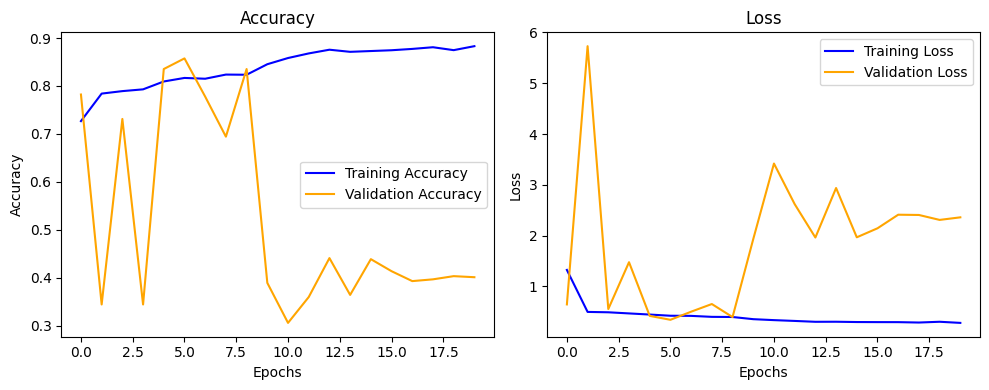

Found 6772 files belonging to 2 classes.
Using 1354 files for validation.
43/43 ━━━━━━━━━━━━━━━━━━━━ 34s 749ms/step


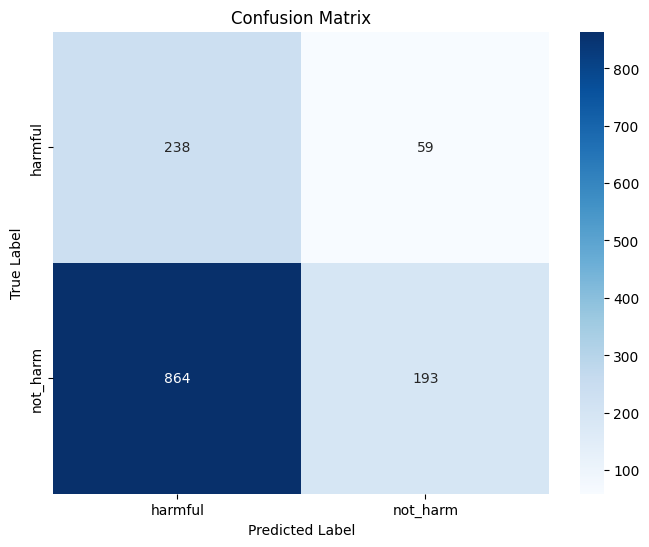

Classification Report:
              precision    recall  f1-score   support

     harmful       0.22      0.80      0.34       297
    not_harm       0.77      0.18      0.29      1057

    accuracy                           0.32      1354
   macro avg       0.49      0.49      0.32      1354
weighted avg       0.65      0.32      0.30      1354



In [ ]:
import json
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow import keras

# Load training history from JSON file
history_path = "/content/drive/My Drive/insect_training_history.json"  # Update path if needed

with open(history_path, "r") as f:
    history = json.load(f)

# Plot Accuracy and Loss
plt.figure(figsize=(10, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history["accuracy"], label="Training Accuracy", color="blue")
plt.plot(history["val_accuracy"], label="Validation Accuracy", color="orange")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy")
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history["loss"], label="Training Loss", color="blue")
plt.plot(history["val_loss"], label="Validation Loss", color="orange")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss")
plt.legend()

plt.tight_layout()
plt.show()

# Load trained model
model_path = "/content/drive/My Drive/insect_classifier.keras"  # Update path if needed
model = keras.models.load_model(model_path)

# Load validation dataset (without augmentation)
dataset_path = "/content/drive/My Drive/insect"  # Update path
img_height, img_width = 150, 150
batch_size = 32

val_ds = keras.preprocessing.image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

# Extract true labels and class names
y_true = np.concatenate([y.numpy() for _, y in val_ds])
class_names = val_ds.class_names

# Make predictions
y_pred_prob = model.predict(val_ds)
y_pred = np.argmax(y_pred_prob, axis=1)

# Compute Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Print classification report
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))


In [ ]:
import os
import tensorflow as tf
import shutil

#  Define original dataset path
dataset_path = "/content/drive/My Drive/insect"

#  Create a TEMPORARY FLAT DIRECTORY for all insect types
temp_dataset_path = "/content/insect_dataset"

# Remove existing folder to avoid conflicts
if os.path.exists(temp_dataset_path):
    shutil.rmtree(temp_dataset_path)

# Recreate the folder
os.makedirs(temp_dataset_path, exist_ok=True)

#  Collect all species from harmful & not_harm categories
for category in ["harmful", "not_harm"]:
    category_path = os.path.join(dataset_path, category)

    if os.path.exists(category_path):
        for insect_species in os.listdir(category_path):
            species_path = os.path.join(category_path, insect_species)

            if os.path.isdir(species_path):  # Ensure it's a directory
                # Create symlink for each species in temp dataset
                os.symlink(species_path, os.path.join(temp_dataset_path, insect_species))

print("All insect species linked successfully!")

# Load dataset correctly
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    temp_dataset_path,  # Now loads all species correctly
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(150, 150),
    batch_size=32,
    label_mode="categorical"  # Multi-class classification
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    temp_dataset_path,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(150, 150),
    batch_size=32,
    label_mode="int"
)

#  Extract final detected classes
class_names = train_ds.class_names
print(f"Final Detected Classes: {class_names}")

# ✅ Verify detection
if len(class_names) > 2:  # More than just "harmful" and "not_harm"
    print(f" Model is correctly detecting {len(class_names)} insect species!")
else:
    print("ERROR: Model is still detecting only 'harmful' and 'not_harm'!")
    print("Ensure dataset subfolders contain images and are readable.")


All insect species linked successfully!
Found 6772 files belonging to 26 classes.
Using 5418 files for training.
Found 6772 files belonging to 26 classes.
Using 1354 files for validation.
Final Detected Classes: ['Africanized Honey Bees (Killer Bees)', 'Aphids', 'Armyworms', 'Brown Marmorated Stink Bugs', 'Cabbage Loopers', 'Citrus Canker', 'Colorado Potato Beetles', 'Corn Borers', 'Corn Earworms', 'Fall Armyworms', 'Fruit Flies', 'Spider Mites', 'Thrips', 'Tomato Hornworms', 'Western Corn Rootworms', 'ants', 'bees', 'beetle', 'catterpillar', 'earwig', 'grasshopper', 'moth', 'slug', 'snail', 'wasp', 'weevil']
 Model is correctly detecting 26 insect species!


In [ ]:
from tensorflow import keras

# Load the trained model
model = keras.models.load_model("/content/drive/My Drive/insect_classifier.keras")

# Evaluate on validation set
loss, accuracy = model.evaluate(val_ds)
print(f"Validation Accuracy: {accuracy:.4f}")
print(f"Validation Loss: {loss:.4f}")


43/43 ━━━━━━━━━━━━━━━━━━━━ 33s 738ms/step - accuracy: 0.3442 - loss: 2.9603
Validation Accuracy: 0.3626
Validation Loss: 2.9046


In [ ]:
# Import necessary libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Define image parameters
img_height, img_width = 150, 150
batch_size = 32

# Reload the dataset (same as before)
new_train_ds_raw = keras.preprocessing.image_dataset_from_directory(
    "/content/drive/My Drive/insect",
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

new_val_ds = keras.preprocessing.image_dataset_from_directory(
    "/content/drive/My Drive/insect",
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

class_names = new_train_ds_raw.class_names
num_classes = len(class_names)
print("Classes:", class_names)

# Apply Data Augmentation
new_data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.3),
    layers.RandomZoom(0.3),
    layers.RandomContrast(0.2),
    layers.RandomTranslation(height_factor=0.2, width_factor=0.2),
])

new_train_ds = new_train_ds_raw.map(lambda x, y: (new_data_augmentation(x, training=True), y))

# Load Pre-trained MobileNetV2 Model
mobilenet_base = keras.applications.MobileNetV2(input_shape=(img_height, img_width, 3),
                                                include_top=False,
                                                weights='imagenet')

mobilenet_base.trainable = False  # Freeze pre-trained layers

# Build New Model Using MobileNetV2
mobilenet_model = keras.Sequential([
    mobilenet_base,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

# Compile Model
mobilenet_model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001),
                        loss='sparse_categorical_crossentropy',
                        metrics=['accuracy'])

# Save Training Progress (Checkpoint)
checkpoint_mobilenet = "/content/drive/My Drive/mobilenet_checkpoint.keras"
checkpoint_callback = keras.callbacks.ModelCheckpoint(filepath=checkpoint_mobilenet,
                                                      save_best_only=True,
                                                      monitor='val_accuracy',
                                                      mode='max')

# Learning Rate Adjustment
lr_scheduler = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001)

# Train Model
epochs = 20
history_mobilenet = mobilenet_model.fit(new_train_ds, validation_data=new_val_ds, epochs=epochs,
                                        callbacks=[checkpoint_callback, lr_scheduler])

# Save the new MobileNetV2 Model
mobilenet_path = "/content/drive/My Drive/insect_classifier_mobilenet.keras"
mobilenet_model.save(mobilenet_path)
print("MobileNetV2 Model saved at", mobilenet_path)


Found 6772 files belonging to 2 classes.
Using 5418 files for training.
Found 6772 files belonging to 2 classes.
Using 1354 files for validation.
Classes: ['harmful', 'not_harm']


<ipython-input-13-86000a9e26f6>:45: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  mobilenet_base = keras.applications.MobileNetV2(input_shape=(img_height, img_width, 3),


Epoch 1/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 225s 1s/step - accuracy: 0.6685 - loss: 0.7887 - val_accuracy: 0.7482 - val_loss: 0.5141 - learning_rate: 1.0000e-04
Epoch 2/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 212s 1s/step - accuracy: 0.7587 - loss: 0.5336 - val_accuracy: 0.7666 - val_loss: 0.4960 - learning_rate: 1.0000e-04
Epoch 3/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 213s 1s/step - accuracy: 0.7744 - loss: 0.5032 - val_accuracy: 0.7688 - val_loss: 0.4934 - learning_rate: 1.0000e-04
Epoch 4/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 212s 1s/step - accuracy: 0.7709 - loss: 0.4840 - val_accuracy: 0.7578 - val_loss: 0.5027 - learning_rate: 1.0000e-04
Epoch 5/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 214s 1s/step - accuracy: 0.7715 - loss: 0.4907 - val_accuracy: 0.7164 - val_loss: 0.5561 - learning_rate: 1.0000e-04
Epoch 6/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 262s 1s/step - accuracy: 0.7822 - loss: 0.4807 - val_accuracy: 0.7489 - val_loss: 0.5173 - learning_rate: 1.0000e-04
Epoch 7/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 204s 1s/step - acc

In [ ]:
!pip install tensorflow
!pip install seaborn scikit-learn


In [ ]:
# Import necessary libraries
from tensorflow import keras

# Reload dataset (Validation Set Only)
import tensorflow as tf
dataset_path = "/content/drive/My Drive/insect"
img_height, img_width = 150, 150
batch_size = 32

val_ds = keras.preprocessing.image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

# Load trained model from Drive
model_path = "/content/drive/My Drive/insect_classifier.keras"
model = keras.models.load_model(model_path)
print("Model loaded successfully!")

# Evaluate on validation set
loss, accuracy = model.evaluate(val_ds)
print(f"Validation Accuracy: {accuracy:.4f}")
print(f"Validation Loss: {loss:.4f}")


Found 6772 files belonging to 2 classes.
Using 1354 files for validation.
Model loaded successfully!
43/43 ━━━━━━━━━━━━━━━━━━━━ 318s 7s/step - accuracy: 0.3255 - loss: 3.0997
Validation Accuracy: 0.3626
Validation Loss: 2.9046


In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)  # Force remount ensures latest files are seen


Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
history_file = "/content/drive/My Drive/xception_history.txt"

# Ensure the directory exists before writing
import os

if not os.path.exists(history_file):
    with open(history_file, "w") as f:
        f.write("0")  # Set the last completed epoch to 0 if no history exists

print("History file created successfully.")

history_file = "/content/drive/My Drive/xception_history.txt"

# Manually set the last saved epoch (change '4' to the actual last completed epoch)
last_completed_epoch = 4

with open(history_file, "w") as f:
    f.write(str(last_completed_epoch))

print(f"History file updated: Last saved epoch is now {last_completed_epoch}")




History file created successfully.
History file updated: Last saved epoch is now 4


In [ ]:
import os

checkpoint_xception = "/content/drive/My Drive/xception_checkpoint.keras"

if os.path.exists(checkpoint_xception):
    print("Checkpoint found.")
else:
    print("Checkpoint not found. Model will start training from scratch.")


Checkpoint found.


In [ ]:
import os

history_file = "/content/drive/My Drive/xception_history.txt"

# Manually set the last completed epoch (change '4' to your last saved epoch)
last_completed_epoch = 4

# Write to the history file
with open(history_file, "w") as f:
    f.write(str(last_completed_epoch))

print(f"History file updated: Last saved epoch is now {last_completed_epoch}")


History file updated: Last saved epoch is now 4


In [ ]:
# Import necessary libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import os

# Define optimized image parameters
img_height, img_width = 224, 224  # Higher resolution for better accuracy
batch_size = 32  # Balanced batch size for performance
AUTOTUNE = tf.data.AUTOTUNE

# Reload the dataset
new_train_ds_raw = keras.preprocessing.image_dataset_from_directory(
    "/content/drive/My Drive/insect",
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

new_val_ds = keras.preprocessing.image_dataset_from_directory(
    "/content/drive/My Drive/insect",
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

# Get class names BEFORE applying `.map()`
class_names = new_train_ds_raw.class_names
num_classes = len(class_names)
print("Classes:", class_names)

# Apply Advanced Data Augmentation
new_data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.3),
    layers.RandomZoom(0.3),
    layers.RandomContrast(0.2),
    layers.RandomTranslation(height_factor=0.2, width_factor=0.2),
])

# Apply `.map()` AFTER getting class names
new_train_ds = new_train_ds_raw.map(lambda x, y: (new_data_augmentation(x, training=True), y))
new_train_ds = new_train_ds.cache().prefetch(buffer_size=AUTOTUNE)  # Speed up training
new_val_ds = new_val_ds.cache().prefetch(buffer_size=AUTOTUNE)

# Load Pre-trained Xception Model (Higher Accuracy than MobileNetV2)
checkpoint_xception = "/content/drive/My Drive/xception_checkpoint.keras"

if os.path.exists(checkpoint_xception):
    xception_model = keras.models.load_model(checkpoint_xception)
    print("Loaded checkpoint model from:", checkpoint_xception)
else:
    print("Checkpoint not found. Training will start from scratch.")

    xception_base = keras.applications.Xception(input_shape=(img_height, img_width, 3),
                                                include_top=False,
                                                weights='imagenet')

    # Unfreeze last 30 layers for fine-tuning
    for layer in xception_base.layers[-30:]:
        layer.trainable = True

    # Build the Fine-Tuned Model
    xception_model = keras.Sequential([
        xception_base,
        layers.GlobalAveragePooling2D(),
        layers.Dense(512, activation='relu'),
        layers.Dropout(0.2),  # Reduced dropout for better learning
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(num_classes, activation='softmax')
    ])

    # Use an optimized learning rate with decay
    xception_model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0003),
                            loss='sparse_categorical_crossentropy',
                            metrics=['accuracy'])

# Load the last saved epoch
history_file = "/content/drive/My Drive/xception_history.txt"

if os.path.exists(history_file):
    with open(history_file, "r") as f:
        last_epoch = int(f.read().strip())
else:
    last_epoch = 0  # Default to start from scratch

print(f"Resuming training from epoch {last_epoch}...")

# Save Training Progress (Checkpoint)
checkpoint_callback = keras.callbacks.ModelCheckpoint(filepath=checkpoint_xception,
                                                      save_best_only=True,
                                                      monitor='val_accuracy',
                                                      mode='max')

# Learning Rate Adjustment
lr_scheduler = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.00001)

# Define the number of additional epochs to train
additional_epochs = 10

# Train the model from the last saved epoch
history_xception = xception_model.fit(new_train_ds, validation_data=new_val_ds,
                                      epochs=last_epoch + additional_epochs,
                                      initial_epoch=last_epoch,
                                      callbacks=[checkpoint_callback, lr_scheduler])

# Save the last trained epoch number
with open(history_file, "w") as f:
    f.write(str(last_epoch + additional_epochs))

# Save final model after training
xception_model.save("/content/drive/My Drive/insect_classifier_xception.keras")
print("Model training continued and saved successfully.")


Found 6772 files belonging to 2 classes.
Using 5418 files for training.
Found 6772 files belonging to 2 classes.
Using 1354 files for validation.
Classes: ['harmful', 'not_harm']
Loaded checkpoint model from: /content/drive/My Drive/xception_checkpoint.keras
Resuming training from epoch 4...
Epoch 5/14
143/170 ━━━━━━━━━━━━━━━━━━━━ 15:22 34s/step - accuracy: 0.9341 - loss: 0.1815